# Algo Trading strategies

In [1]:
import sys
import datetime as dt
import cbpro
import time
import json
import pandas as pd
import technicalanalysis as ta

In [2]:
with open('/Users/paul/Library/Mobile Documents/com~apple~CloudDocs/1 Personal/2 Finances/1 Bank/coinbasepro.json') as f:
    api = json.load(f)

auth_client = cbpro.AuthenticatedClient(api['api_key'], api['api_secret'], api['passphrase'])


In [3]:
product = 'BTC-USD'
currency = 'BTC'
period = 3600

In [4]:
# Here we get price for that last day
# getting historical data
prices = pd.DataFrame()
end = dt.datetime.utcnow()
start = end - dt.timedelta(days=1)
historicData = auth_client.get_product_historic_rates(product, granularity=period, start=start, end=end)
historicData = pd.DataFrame(historicData, columns=['date', 'low', 'high', 'open', 'close', 'volume']).sort_values('date', ascending=False).reset_index(drop=True)
prices = pd.concat((prices, historicData))

# adding two other days of data
for i in range(2):
    time.sleep(1)
    end = start
    start = end - dt.timedelta(days=1)
    historicData = auth_client.get_product_historic_rates(product, granularity=period, start=start, end=end)
    historicData = pd.DataFrame(historicData, columns=['date', 'low', 'high', 'open', 'close', 'volume']).sort_values('date', ascending=False).reset_index(drop=True)
    prices = pd.concat((prices, historicData))
    
# converting to readable date
prices.date = pd.to_datetime(prices['date'], unit='s')
prices = prices.sort_values('date').reset_index(drop=True)
prices['ico_id'] = currency
prices['ico_symbol'] = currency
prices = prices[['ico_id', 'ico_symbol', 'date', 'low', 'high', 'open', 'close', 'volume']]

In [6]:
ta.signals_stats(ta.sar(prices), exchange='coinbase_pro')

{'total_roi': -0.021796693353939967,
 'holding_roi': 0.030318871794220506,
 'accuracy': 0.6666666666666666,
 'sharpe': 0.5220730622611904,
 'sortino': 0.7684625145338608,
 'max_drawdown': -0.03551237715871536,
 'volatility': 0.11451877337751867,
 'avg_roi': -0.007103640876205963,
 'best_roi': 0.013440975819422496,
 'win_avg_roi': 0.006981637248990036,
 'worst_roi': -0.03527419712659796,
 'loss_avg_roi': -0.03527419712659796,
 'nb_trades': 3}

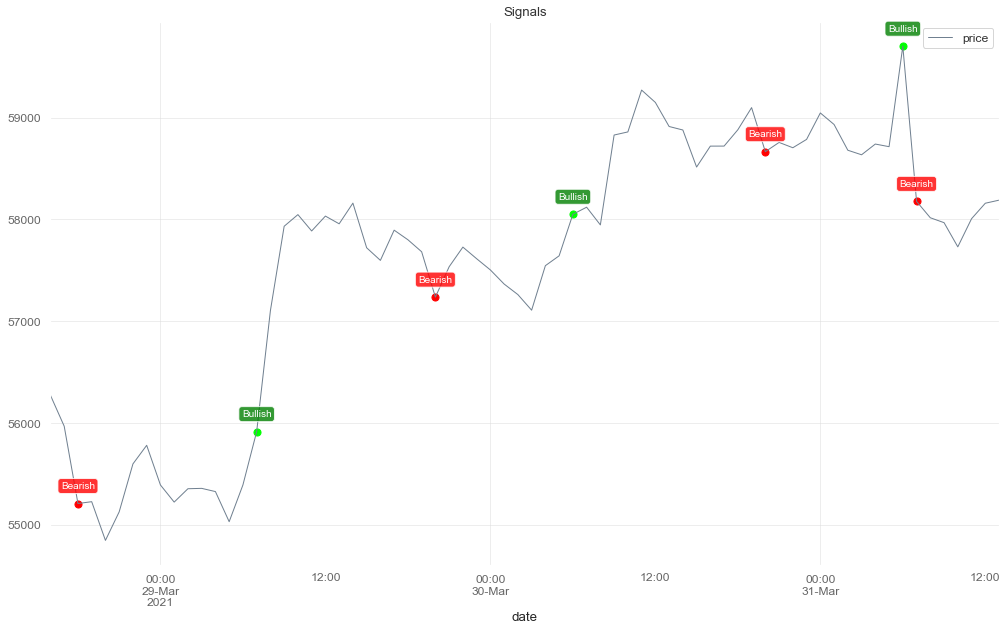

In [7]:
ta.plot_signals(ta.sar(prices))

### Indicator


In [8]:
indicators = ['mama', 'frama', 'sar', 'bop', 'roc', 'adosc']
weights = [0.2768361581920904, 0.06779661016949153, 0.18361581920903955, 0.20056497175141244, 0.05649717514124294, 0.21468926553672316]
threshold = .5
comb = ta.CombinedIndicator(indicators, weights, threshold)
signals = comb.get_signals(prices)

ta.signals_stats(signals, exchange='coinbase_pro')

{'total_roi': -0.007605428947703885,
 'holding_roi': -0.00760542894770391,
 'accuracy': nan,
 'sharpe': 0.2707748133417881,
 'sortino': 0.3688343977035841,
 'max_drawdown': -0.03304001909459786,
 'volatility': 0.13200840350028065,
 'avg_roi': nan,
 'best_roi': nan,
 'win_avg_roi': nan,
 'worst_roi': nan,
 'loss_avg_roi': nan,
 'nb_trades': 0}

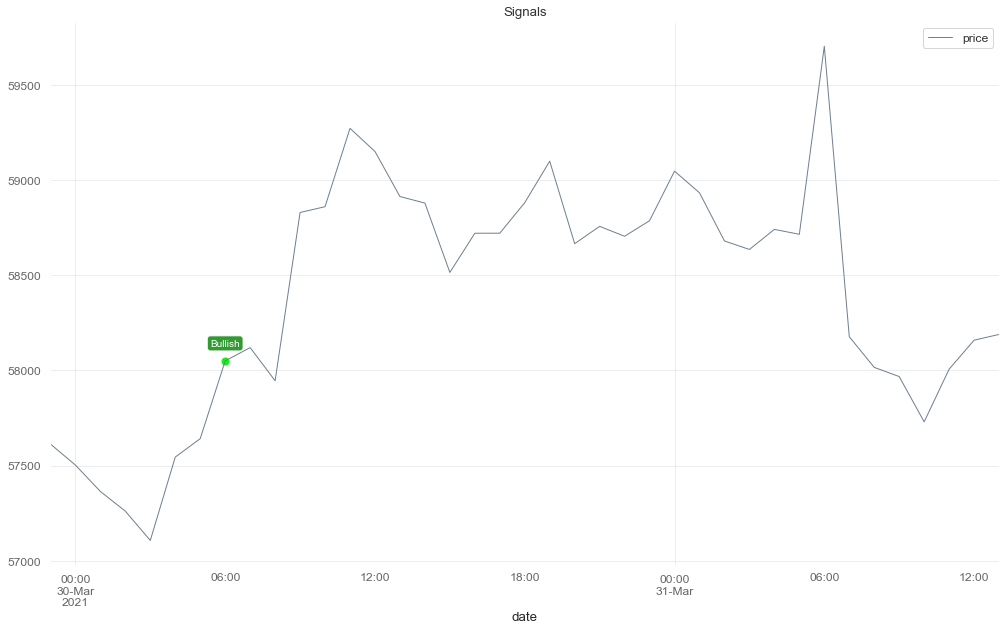

In [9]:
ta.plot_signals(signals)